In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from util import read_optitrack, read_biotac, time_interp
import numpy as np

In [2]:
data_dir = '../data/processed_21_02_2020/'

### 1. Get operating z range from optitrack

In [3]:
top_opt = 'top_cal1_optitrack.pkl'
bot_opt = 'bottom_cal1_optitrack.pkl'

In [4]:
top_df = read_optitrack(data_dir+top_opt)
bot_df = read_optitrack(data_dir+bot_opt)

top_optitrack_mean = top_df.pz.mean()
top_optitrack_std = top_df.pz.std()

bottom_optitrack_mean = bot_df.pz.mean()
bottom_optitrack_std = bot_df.pz.std()

top_optitrack_mean, top_optitrack_std, bottom_optitrack_mean, bottom_optitrack_std

(0.8614060867226029,
 0.0006788767846529872,
 0.3869688682652708,
 0.0009603894367372258)

### 2. Read and plot optitrack data

In [5]:
opt = 'tap1_optitrack.pkl'
opt_df = read_optitrack(data_dir+opt)

/home/tasbolat/tas_python_env/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/home/tasbolat/tas_python_env/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/tasbolat/tas_python_env/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


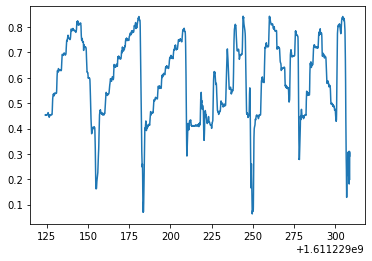

In [6]:
fig, ax = plt.subplots()
ax.plot(opt_df.time, opt_df.pz)
plt.show()

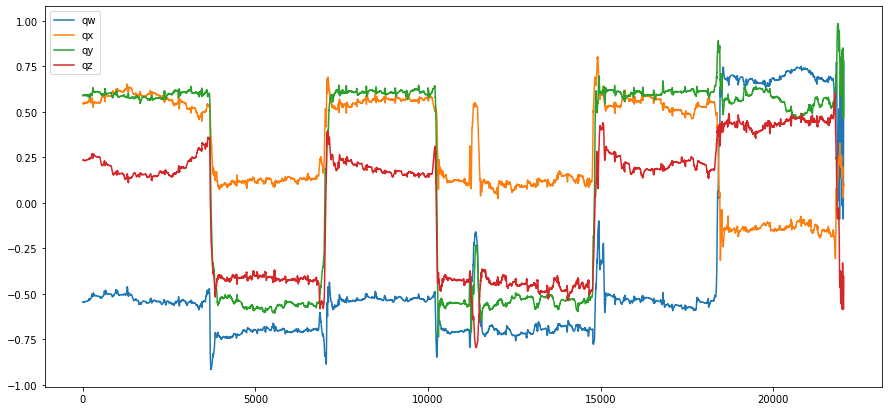

In [7]:
fig, ax = plt.subplots(figsize=(15,7))
opt_df[['qw', 'qx', 'qy', 'qz']].plot(ax=ax)
plt.show()

### 3. Read Biotac and plot

In [8]:
bio = 'tap1_calibrated.pkl'

In [9]:
bio_df = read_biotac(data_dir+bio)

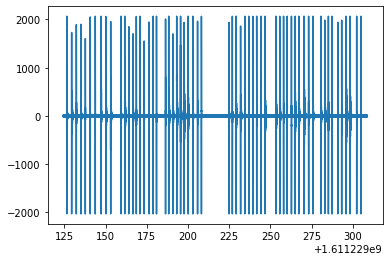

In [10]:
pac = sum(bio_df.pac.to_list(), ())
t=time_interp(bio_df.t.values)

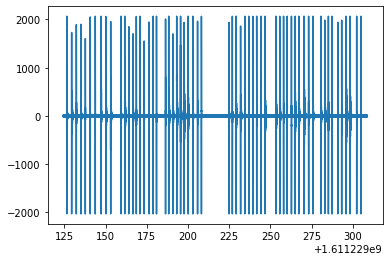

In [11]:
plt.plot(t, pac[:-22], label='pac 2.2 kHz')
plt.show()

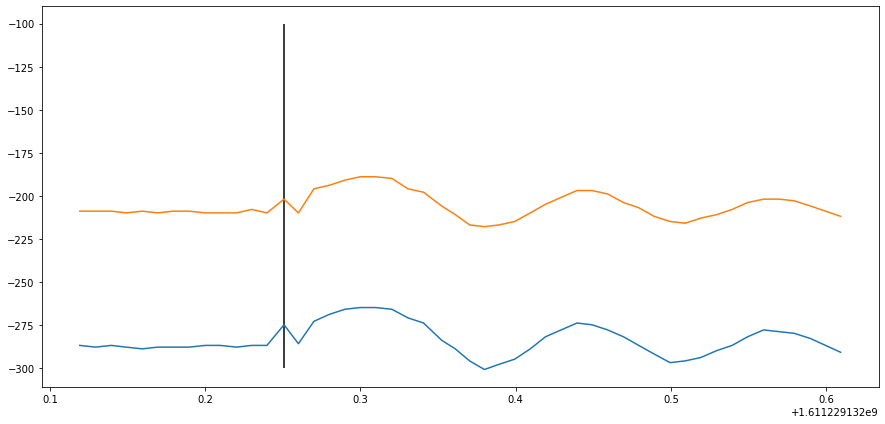

In [60]:
#plt.plot(bio_df.t, bio_df.el_6)
fig, ax = plt.subplots(figsize=(15,7))
s1 = 800
s2 = 850
pp = 813
plt.plot(bio_df.t[s1:s2], bio_df.el_7[s1:s2])
plt.plot(bio_df.t[s1:s2], bio_df.el_6[s1:s2])
plt.vlines(x=bio_df.t[pp], ymin=-300, ymax=-100)
plt.show()

In [14]:
bio_df


t  tdc  tac  pdc  \
0      1.611229e+09  -48    1  455   
1      1.611229e+09  -47    2  456   
2      1.611229e+09  -48    2  455   
3      1.611229e+09  -47    3  455   
4      1.611229e+09  -47    3  455   
...             ...  ...  ...  ...   
18460  1.611229e+09   -8    0  463   
18461  1.611229e+09   -8    0  463   
18462  1.611229e+09   -9   -1  463   
18463  1.611229e+09   -8   -1  463   
18464  1.611229e+09   -8    0  463   

                                                     pac  \
0      (-4, 4, 0, -2, -3, 3, 9, -1, -5, 3, 3, -3, -1,...   
1      (-5, 1, 0, -2, 0, -8, -1, 0, 5, -6, 1, -2, 2, ...   
2      (-2, 1, -5, 0, 0, -9, -4, 0, 4, 0, 0, 0, 3, 2,...   
3      (-5, -6, -2, -1, -1, 0, 0, 0, -2, 4, 11, 7, -2...   
4      (-2, 1, 10, 0, -5, 0, 10, 7, -6, -6, 4, 10, -4...   
...                                                  ...   
18460  (-1, -1, 5, 2, 3, 3, -1, -5, 10, 6, -2, 2, 6, ...   
18461  (3, -1, 6, 3, 3, -5, 0, -2, -2, -11, -2, 1, 11...   
18462  (-4, -2, 6, -1, -3, -5, 2, 0, 0, -4, -6, 0, -1...   
18463  (1, -4, 0, -3, 3, 2, -4, -2, 1, 0, 0, 3, 3, -6...   
18464  (-8, -7, 2, -3, -5, 3, 0, -5, -1, -1, -7, 0, -...   

                                                      el  el_0  el_1  el_2  \
0      (119, -27, 17, 100, 37, 99, -217, -290, -268, ...   119   -27    17   
1      (119, -26, 16, 101, 37, 100, -218, -288, -266,...   119   -26    16   
2      (119, -27, 17, 99, 38, 100, -217, -289, -267, ...   119   -27    17   
3      (118, -28, 16, 99, 36, 99, -218, -288, -267, -...   118   -28    16   
4      (118, -28, 18, 99, 37, 100, -218, -289, -267, ...   118   -28    18   
...                                                  ...   ...   ...   ...   
18460  (155, -27, 20, 107, 37, 103, -180, -290, -250,...   155   -27    20   
18461  (156, -28, 22, 108, 36, 100, -180, -290, -250,...   156   -28    22   
18462  (157, -28, 20, 108, 36, 103, -181, -291, -249,...   157   -28    20   
18463  (154, -28, 20, 107, 36, 102, -181, -290, -249,...   154   -28    20   
18464  (155, -28, 22, 107, 37, 102, -180, -290, -249,...   155   -28    22   

       el_3  ...  pac_12  pac_13  pac_14  pac_15  pac_16  pac_17  pac_18  \
0       100  ...      -1       1      -2       0       0       2      -1   
1       101  ...       2       5      -3      -5       1       7      -4   
2        99  ...       3       2      -2      -8       2       6      -5   
3        99  ...      -2       6       4       5      -6       3       2   
4        99  ...      -4     -12       0      10      -7     -11      -2   
...     ...  ...     ...     ...     ...     ...     ...     ...     ...   
18460   107  ...       6      -1      -2       1       3       2       6   
18461   108  ...      11      -3       1       4       0      -3      -3   
18462   108  ...      -1     -10      -8      -2      -4      -7       1   
18463   107  ...       3      -6       4       4      -3      -5       0   
18464   107  ...      -5      -4       3      -4      -4      -1      -6   

       pac_19  pac_20  pac_21  
0          -2      -6      -8  
1           4       5      -1  
2          -7      -3       0  
3           5       2       2  
4           2       0      -3  
...       ...     ...     ...  
18460       1       4       7  
18461      -4       6       0  
18462      -1      -5      -2  
18463       1       2      -4  
18464      -3       2      -1  

[18465 rows x 47 columns]

### Wrenches